In [50]:
import json
import pandas as pd
import os
from pathlib import Path
import sys

sys.path.append("../")


from config import DATA_DIR

In [51]:
logs_dir = DATA_DIR / "connectedness/mag_logs"
json_files = sorted([f for f in logs_dir.glob("*.json")])

data = []

for json_file in json_files:
    with open(json_file, "r") as f:
        log_data = json.load(f)

    # Extract key information from each log entry
    record = {
        "file_id": json_file.stem,
        "question": log_data.get("question", ""),
        "hit@1": log_data.get("hit@1", None),
        "hit@5": log_data.get("hit@5", None),
        "recall@20": log_data.get("recall@20", None),
    }

    data.append(record)
    
df = pd.DataFrame(data)

In [52]:
df['recall@20'].mean()

np.float64(0.42093582887700537)

In [53]:
import matplotlib.pyplot as plt
import numpy as np

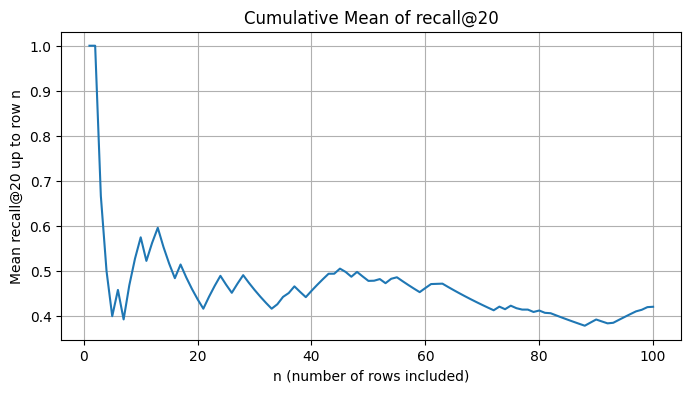

In [54]:
column = 'recall@20'

df['index'] = df.index
df = df.sort_values('index').reset_index(drop=True)

means = df[column].expanding().mean()
n_rows = np.arange(1, len(means) + 1)

plt.figure(figsize=(8, 4))
plt.plot(n_rows, means)
plt.xlabel("n (number of rows included)")
plt.ylabel(f"Mean {column} up to row n")
plt.title(f"Cumulative Mean of {column}")
plt.grid(True)
plt.show()